In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
superstore = pd.read_csv('C:/Users/Rafael/Documents/GitHub/Retail_Superstore_Analysis/superstore.csv', encoding = 'cp1252') # Reading the csv file with a standardized encoding since the file is not in a proper encoding
superstore.to_csv('C:/Users/Rafael/Documents/GitHub/Retail_Superstore_Analysis/superstore_backup.csv', index=False, encoding = 'utf-8') # Exporting the file as a backup with the standard UTF-8 encoding
superstore.to_csv('C:/Users/Rafael/Documents/GitHub/Retail_Superstore_Analysis/superstore.csv', index=False, encoding = 'utf-8') # Replacing the csv file with the standard UTF-8 encoding


In [ ]:
superstore.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# superstore.isna() # No Null values in the dataset

In [78]:
superstore.info() # There are no NULL values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [21]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])
superstore['Category'] = superstore['Category'].astype('category')
superstore['Sub-Category'] = superstore['Sub-Category'].astype('category')

In [22]:
# superstore.describe()

In [140]:
rtsp = superstore.groupby(['Region'])[['Sales', 'Profit']].sum() # rtsp is short for regional_total_sales_and_profit

In [141]:
rtsp

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


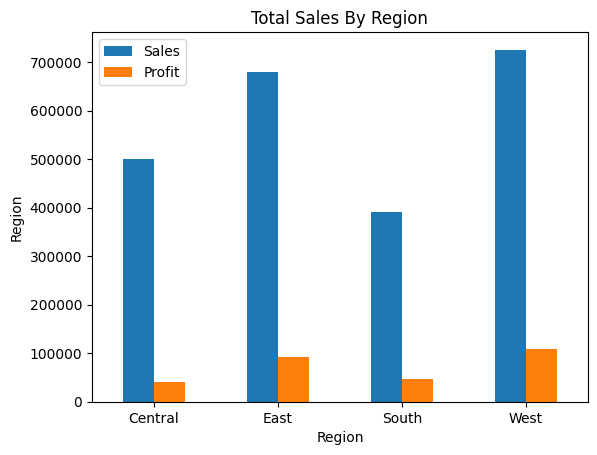

In [154]:
rtsp.plot(kind = 'bar', title = 'Total Sales By Region')
plt.ylabel('Region')
plt.xticks(rotation = 0)
plt.show()

In [131]:
region_yearly_sales = superstore[(superstore['Ship Date'].dt.year != 2018)] \
                .groupby(['Region', superstore['Ship Date'].dt.year])['Sales'].sum().round(2)

In [132]:
region_yearly_sales

Region   Ship Date
Central  2014         102899.86
         2015         103222.58
         2016         147071.38
         2017         147145.75
East     2014         119992.24
         2015         164991.71
         2016         180090.40
         2017         213105.52
South    2014         103284.80
         2015          71324.55
         2016          94019.88
         2017         121213.22
West     2014         144206.29
         2015         139903.66
         2016         190144.10
         2017         249425.23
Name: Sales, dtype: float64

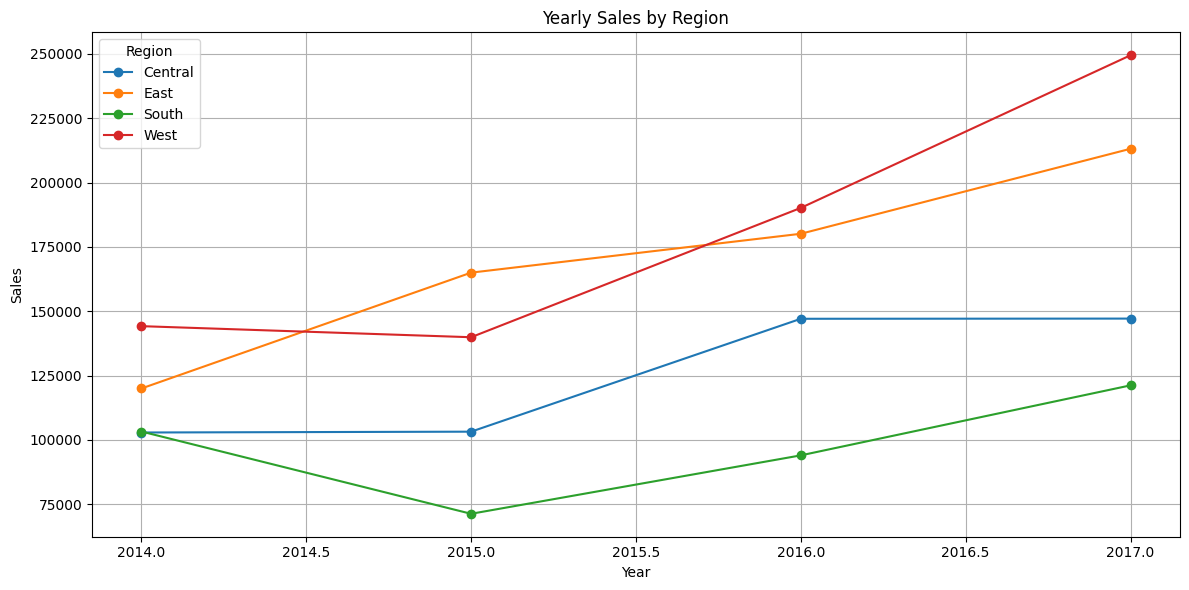

In [139]:
plt.figure(figsize=(12, 6))

rys = region_yearly_sales.reset_index()

for region in rys['Region'].unique():
    subset = rys[rys['Region'] == region]
    plt.plot(subset['Ship Date'], subset['Sales'], marker='o', label=region)

plt.title("Yearly Sales by Region")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()

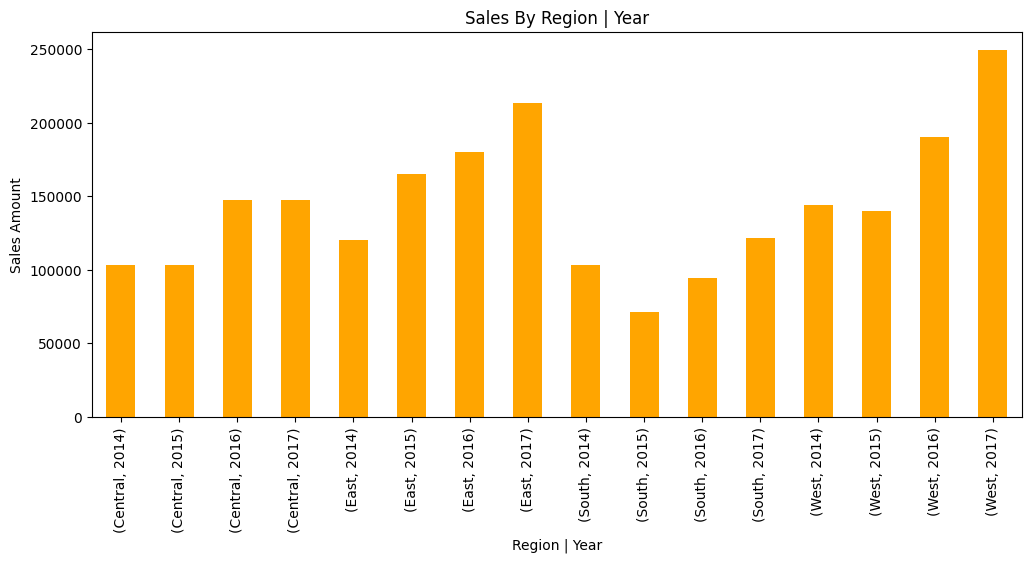

In [133]:
plt.figure(figsize= (12,5))
# plt.plot(region_yearly_sales['Region'], region_yearly_sales['Sales'])
region_yearly_sales.plot(kind = 'bar', color = 'orange')
plt.title('Sales By Region | Year')
plt.ylabel('Sales Amount')
plt.xlabel('Region | Year')
plt.show()

In [96]:
yearly_sales = superstore.groupby([superstore['Ship Date'].dt.year])['Sales'].sum().round(2)

In [98]:
yearly_sales

Ship Date
2014    470383.19
2015    479442.50
2016    611325.75
2017    730889.72
2018      5159.70
Name: Sales, dtype: float64

Text(0, 0.5, 'Total Sales')

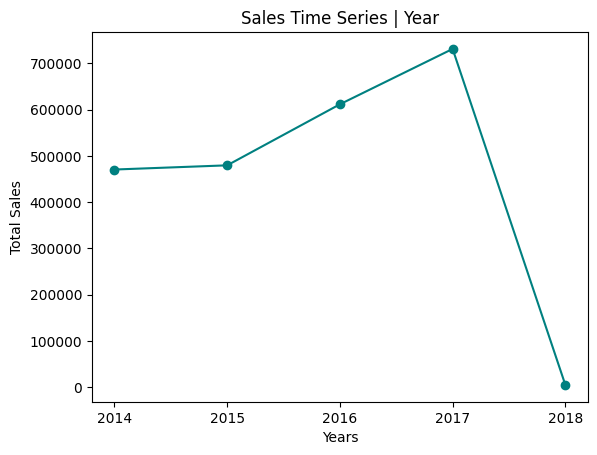

In [105]:
# plt.plot(yearly_sales['Ship Date'], yearly_sales['Sales'], color = 'teal', marker = 'o')
yearly_sales.plot(kind = 'line', color = 'teal', marker = 'o')
plt.xticks(yearly_sales.index)
# plt.xticks(yearly_sales['Ship Date'])

plt.title('Sales Time Series | Year')
plt.xlabel('Years')
plt.ylabel('Total Sales')